# Лабораторна робота 1.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [429]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

In [430]:
points = 500
class1 = np.array([-2, -2])
class2 = np.array([2, 2])

std_dev = 1.0

In [431]:
dataset_class1 = np.random.normal(loc=class1, scale=std_dev, size=(points, 2))
dataset_class2 = np.random.normal(loc=class2, scale=std_dev, size=(points, 2))

In [432]:
label_class1 = np.ones((points, 1))
label_class2 = np.full((points, 1), 2)

In [433]:
data_class1 = np.hstack((dataset_class1, label_class1))
data_class2 = np.hstack((dataset_class2, label_class2))

In [434]:
data = np.vstack((data_class1, data_class2))

In [435]:
df = pd.DataFrame(data, columns=['x', 'y', 'class'])
csv = "linear_data.csv"
df.to_csv(csv, index=False)

In [436]:
from sklearn.linear_model import LogisticRegression

In [437]:
x = df[['x', 'y']]
y = df['class']

model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

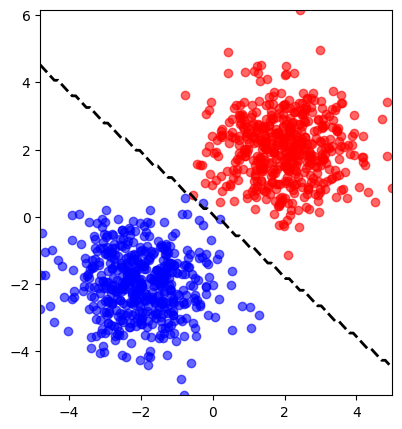

In [438]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(data_class1[:, 0], data_class1[:, 1], color='blue', label="Class 1", alpha=0.6)
plt.scatter(data_class2[:, 0], data_class2[:, 1], color='red', label="Class 2", alpha=0.6)

xx, yy = np.meshgrid(np.linspace(x.x.min(), x.x.max(), 100), np.linspace(x.y.min(), x.y.max(), 100))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contour(xx, yy, z, levels=[1], linewidths=2, colors='black', linestyles='dashed')

plt.show()

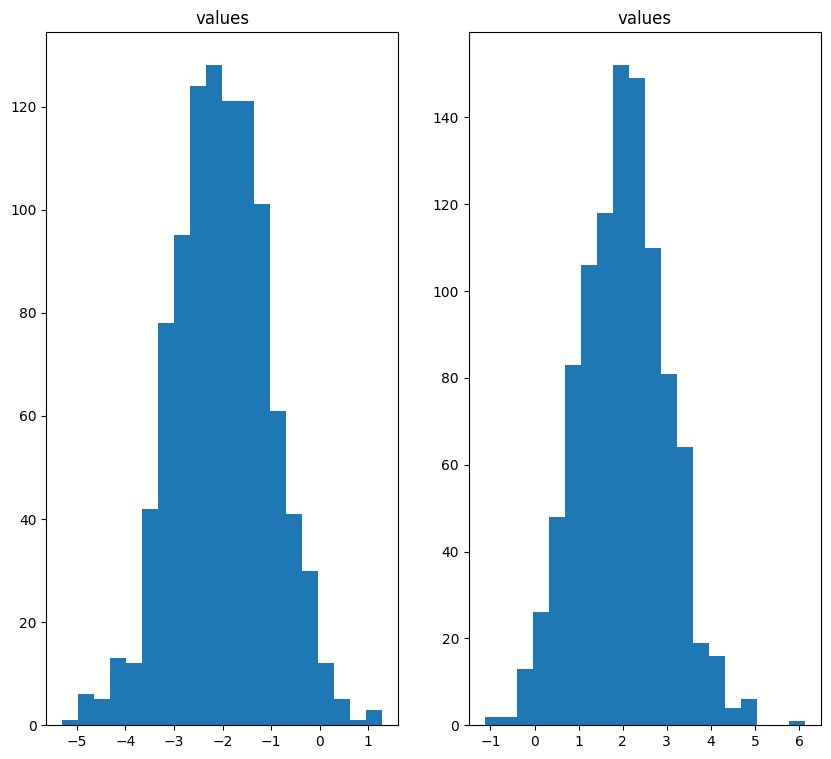

In [439]:
fig, axes = plt.subplots(1, 2, figsize=(10, 9))

axes[0].hist(dataset_class1.flatten(), bins=20)
axes[1].hist(dataset_class2.flatten(), bins=20)

axes[0].set_title("Class 1")
axes[1].set_title("Class 2")

axes[0].set_title("values")
axes[1].set_title("values")

plt.show()

<p>Для кожного класу створив за допомогою нормального розподілу з центральними точками у -2, -2 для першого класу і 2, 2 для другого класу.</p>
<p>датасети створював за допомогою np.random.normal, через те що в ній можна вказати середнє значення та відхилення і забезпечує швидкість генерації датасету</p>
<p>кожному класу присвоїно 1.0 мітку для 1 класу та 2.0 для другого класу.</p>
<p>створив графік де чітко видно і розмежовано два класи.</p>
<p>також створив гістограми щоб переконатися у правильності розподілу.</p>





**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

In [440]:
points = 300
class1 = np.array([-1.5, -1.5])
class2 = np.array([1.5, -1.5])
class3 = np.array([0, 1.5])

std_dev = 1.0

In [441]:
dataset_class1 = np.random.normal(loc=class1, scale=std_dev, size=(points, 2))
dataset_class2 = np.random.normal(loc=class2, scale=std_dev, size=(points, 2))
dataset_class3 = np.random.normal(loc=class3, scale=std_dev, size=(points, 2))

In [442]:
label_class1 = np.ones((points, 1))
label_class2 = np.full((points, 1), 2)
label_class3 = np.full((points, 1), 3)

In [443]:
data_class1 = np.hstack((dataset_class1, label_class1))
data_class2 = np.hstack((dataset_class2, label_class2))
data_class3 = np.hstack((dataset_class3, label_class3))

In [444]:
dataset = np.vstack((data_class1, data_class2, data_class3))

In [445]:
df = pd.DataFrame(dataset, columns=['x', 'y', 'class'])
csv = "linear_data_3_classes.csv"
df.to_csv(csv, index=False)

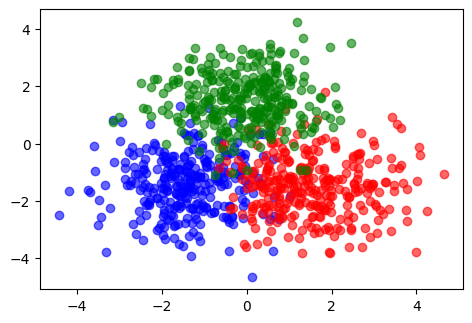

In [446]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(data_class1[:, 0], data_class1[:, 1], color='blue', label='Клас 1', alpha=0.6)
plt.scatter(data_class2[:, 0], data_class2[:, 1], color='red', label='Клас 2', alpha=0.6)
plt.scatter(data_class3[:, 0], data_class3[:, 1], color='green', label='Клас 3', alpha=0.6)


In [447]:
import seaborn as sns

Text(0.5, 1.0, 'values')

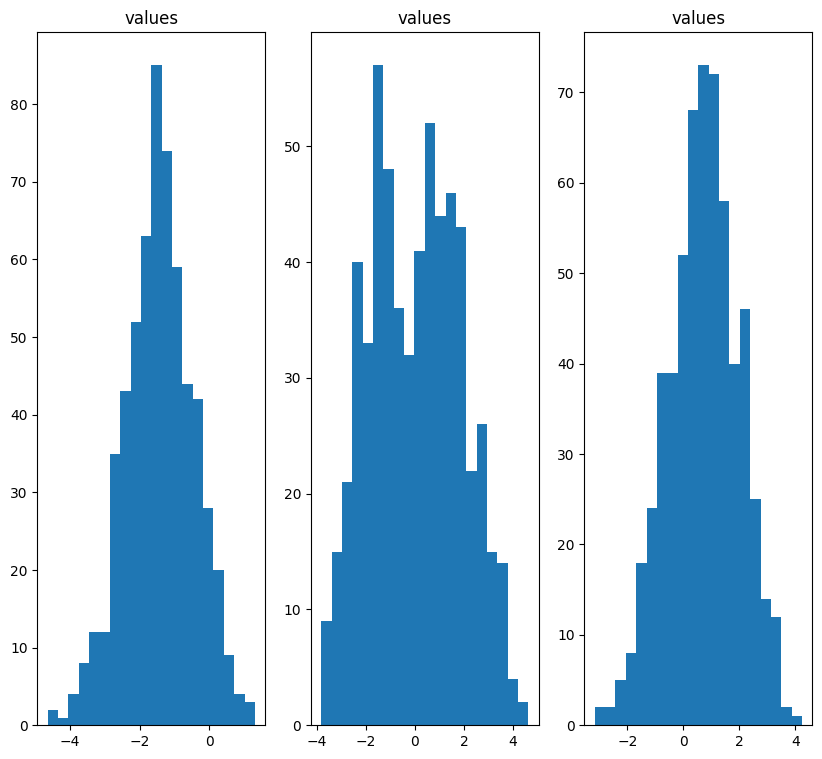

In [448]:
fig, axes = plt.subplots(1, 3, figsize=(10, 9))

axes[0].hist(dataset_class1.flatten(), bins=20)
axes[1].hist(dataset_class2.flatten(), bins=20)
axes[2].hist(dataset_class3.flatten(), bins=20)

axes[0].set_title("Class 1")
axes[1].set_title("Class 2")
axes[2].set_title("Class 3")

axes[0].set_title("values")
axes[1].set_title("values")
axes[2].set_title("values")

<Axes: >

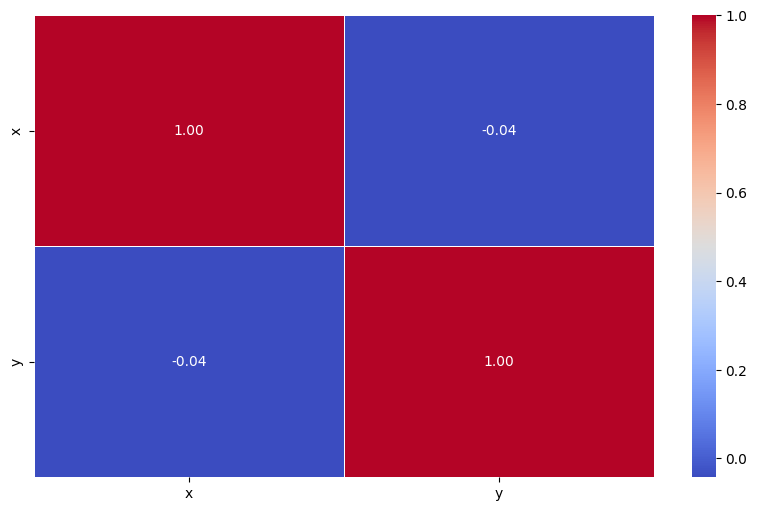

In [449]:
data_corr = df[['x', 'y']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

<p>визначив 3 класи з трьома центрами 1 клас [-1.5, -1.5] 2 клас [1.5, -1.5] та 3 клас [0, 1.5].</p>
<p>точки підібраті таким чином щоб класи мали перетини один між одним.</p>
<p>генерацію даних використовував такуж саму як в попередньому завдані.</p>
<pРозподіл даних є нормальним.></p>
<p>згідно гістограми дані свідчать про відсутність лінійної залеєності між ними.</p>

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

In [450]:
points = 500

radius_inner_center = 10.0
radius_outer_center = 15.0

width_inner_tor = 5.0
width_outer_tor = 2.0

In [451]:
def generate_tor(n: int, center: float, width: float):
    
    angles = np.random.uniform(0, 2*np.pi, n)
    
    noise = np.random.uniform(-width/2, width/2, n)
    
    radii = center + noise
    
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    
    return np.vstack((x, y)).T, radii

In [452]:
data_inner_tor, radii_inner_tor = generate_tor(points, radius_inner_center, width_inner_tor)
label_inner_tor = np.ones((points, 1))

data_outer_tor, radii_outer_tor = generate_tor(points, radius_outer_center, width_outer_tor)
label_outer_tor = np.full((points, 1), 2)

In [453]:
data_inner_full = np.hstack((data_inner_tor, label_inner_tor))
data_outer_full = np.hstack((data_outer_tor, label_outer_tor))

data_tors = np.vstack((data_outer_full, data_inner_full))

In [454]:
df = pd.DataFrame(data_tors, columns=['x', 'y', 'class'])
csv_filename = 'torus_data.csv'
df.to_csv(csv_filename, index=False)

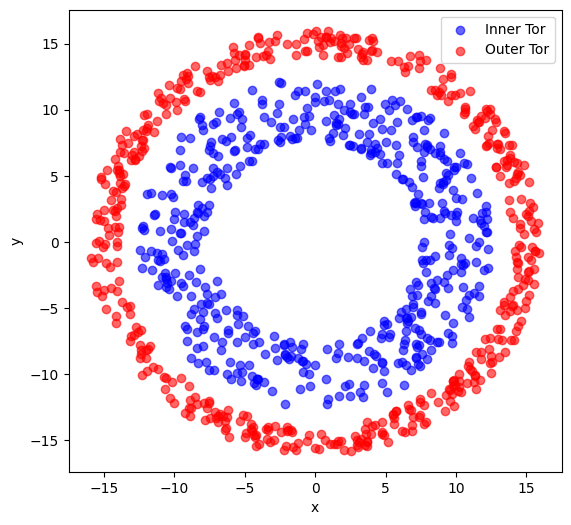

In [455]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_inner_tor[:, 0], data_inner_tor[:, 1], color='blue', label='Inner Tor', alpha=0.6)
plt.scatter(data_outer_tor[:, 0], data_outer_tor[:, 1], color='red', label='Outer Tor', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Text(0.5, 1.0, 'values')

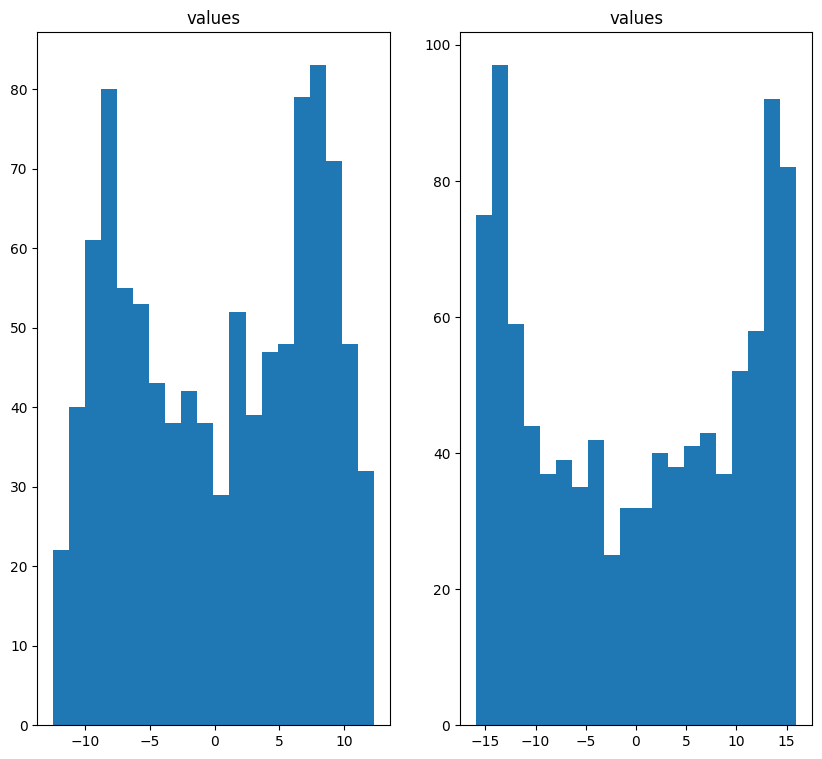

In [456]:
fig, axes = plt.subplots(1, 2, figsize=(10, 9))

axes[0].hist(data_inner_tor.flatten(), bins=20)
axes[1].hist(data_outer_tor.flatten(), bins=20)

axes[0].set_title("Inner Tor")
axes[1].set_title("Outer Tor")

axes[0].set_title("values")
axes[1].set_title("values")


<p>Для генерації торів використовував np.random.uniform з рівномірно розпреділеним даними від 0 до 2п </p>
<p>Також для кожної точки генеруєся первне відхидення від -width/2 до width/2.</p>
<p>x та y перетворюємо у декартові координати та отримуємо точки які вираховуємо</p>
<p>x = radii * np.cos(angles)</p>
<p>y = radii * np.sin(angles)</p>
<p>Результатом того отримуємо матрицю точок x та y</p>

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

In [457]:
n_points = 500           
noise = 0.2              
theta_max = 4 * np.pi    
a = 0.5                 
b = 0.3   

In [458]:
theta1 = np.linspace(0, theta_max, n_points)
r1 = a + b * theta1
x1 = r1 * np.cos(theta1) + np.random.normal(0, noise, n_points)
y1 = r1 * np.sin(theta1) + np.random.normal(0, noise, n_points)
labels1 = np.zeros(n_points, dtype=int)

In [459]:
theta2 = np.linspace(0, theta_max, n_points)
r2 = a + b * theta2
x2 = r2 * np.cos(-theta2) + np.random.normal(0, noise, n_points)
y2 = r2 * np.sin(-theta2) + np.random.normal(0, noise, n_points)
labels2 = np.ones(n_points, dtype=int)

In [460]:
x = np.concatenate([np.stack([x1, y1], axis=1), np.stack([x2, y2], axis=1)], axis=0)
y = np.concatenate([labels1, labels2])

In [461]:
df = pd.DataFrame(x, columns=["x", "y"])
df["class"] = y
df.to_csv("spiral_dataset.csv")

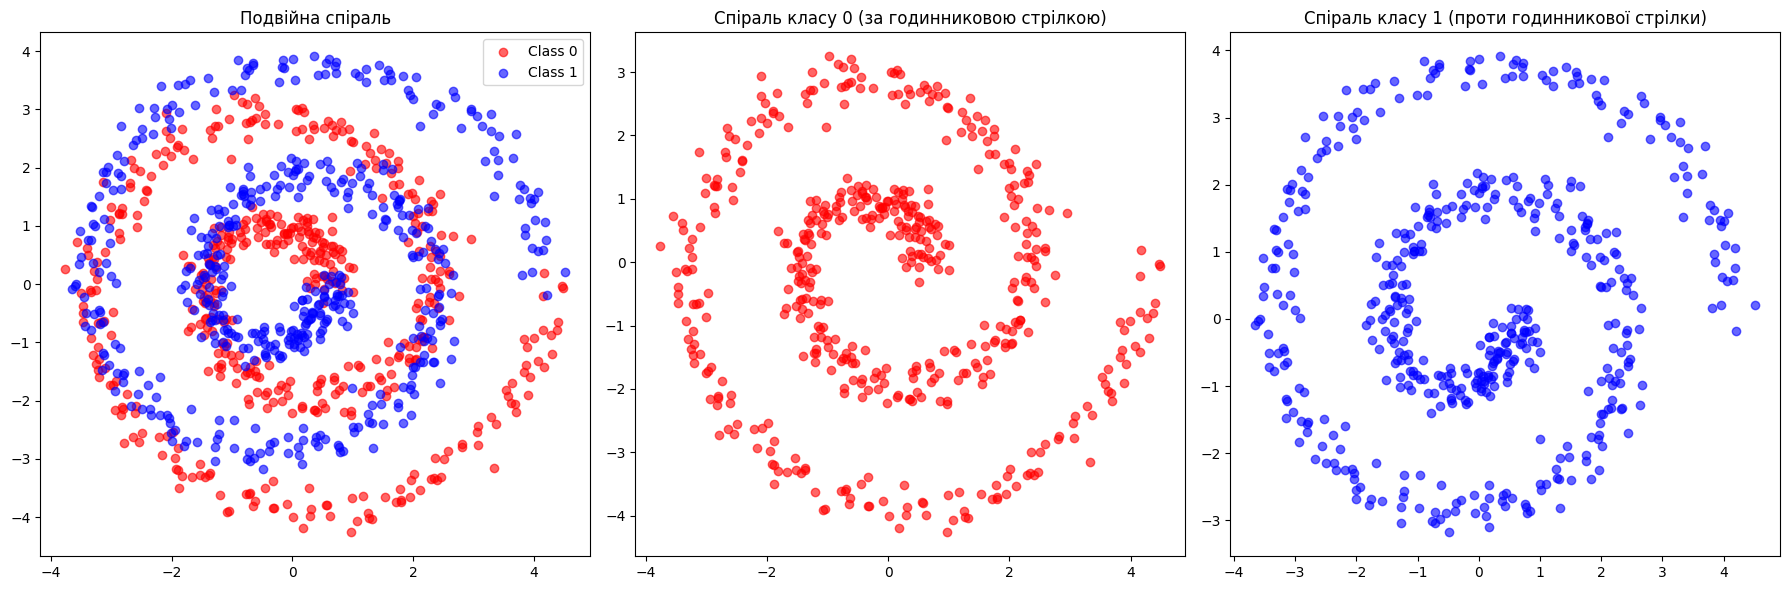

In [462]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].scatter(x1, y1, color="red", label="Class 0", alpha=0.6)
axs[0].scatter(x2, y2, color="blue", label="Class 1", alpha=0.6)
axs[0].set_title("Подвійна спіраль")
axs[0].legend()

axs[1].scatter(x1, y1, color="red", alpha=0.6)
axs[1].set_title("Спіраль класу 0 (за годинниковою стрілкою)")

axs[2].scatter(x2, y2, color="blue", alpha=0.6)
axs[2].set_title("Спіраль класу 1 (проти годинникової стрілки)")

plt.tight_layout()
plt.show()

<p>Генерація спіралей робив задопомогою np.linsspace(0, theta_max, n_points) це дає рівноморне розподілення від 0 до 4п.</p>
<p>r1 = a + b * theta1 - це дає нам змогу радіусу збільшуватися лінійно з кутом це створює вигляд спіралі.</p>
<p>x та y, для них використовується перетворення на декортову координати:</p>
<p>x1 = r1 * np.cos(theta1) + np.random.normal(0, noise, n_points)</p>
<p>y1 = r1 * np.sin(theta1) + np.random.normal(0, noise, n_points)</p>
<p>також до них додається шум для бульшої нерівності в даних.</p>

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

In [463]:
def lorenz_system(x, y, z, sigma, rho, beta):
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return dx, dy, dz

def run_lorenz(sigma, rho, beta, x0=1.0, y0=1.0, z0=1.0, dt=0.01, steps=10000):
    xs = np.empty(steps)
    ys = np.empty(steps)
    zs = np.empty(steps)

    x, y, z = x0, y0, z0
    for i in range(steps):
        xs[i], ys[i], zs[i] = x, y, z

        dx1, dy1, dz1 = lorenz_system(x, y, z, sigma, rho, beta)
        dx2, dy2, dz2 = lorenz_system(x + dx1*dt/2, y + dy1*dt/2, z + dz1*dt/2, sigma, rho, beta)
        dx3, dy3, dz3 = lorenz_system(x + dx2*dt/2, y + dy2*dt/2, z + dz2*dt/2, sigma, rho, beta)
        dx4, dy4, dz4 = lorenz_system(x + dx3*dt, y + dy3*dt, z + dz3*dt, sigma, rho, beta)

        x += (dx1 + 2*dx2 + 2*dx3 + dx4) * dt / 6
        y += (dy1 + 2*dy2 + 2*dy3 + dy4) * dt / 6
        z += (dz1 + 2*dz2 + 2*dz3 + dz4) * dt / 6

    return xs, ys, zs

In [464]:
parameter_sets = [
    {"sigma": 10.0, "rho": 28.0, "beta": 8/3}, 
    {"sigma": 14.0, "rho": 35.0, "beta": 3.0},  
    {"sigma": 10.0, "rho": 99.96, "beta": 8/3}, 
]

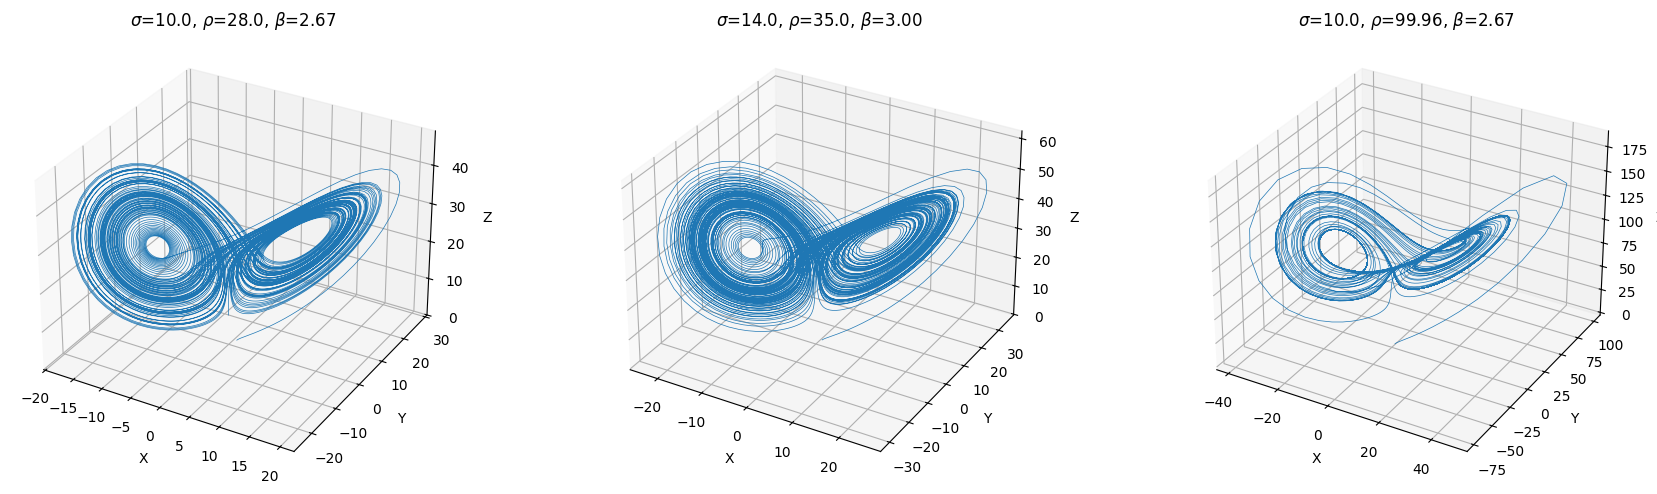

In [465]:
fig = plt.figure(figsize=(18, 5))

for i, params in enumerate(parameter_sets):
    xs, ys, zs = run_lorenz(**params)

    ax = fig.add_subplot(1, len(parameter_sets), i + 1, projection='3d')
    ax.plot(xs, ys, zs, lw=0.5)
    ax.set_title(f"$\\sigma$={params['sigma']}, $\\rho$={params['rho']}, $\\beta$={params['beta']:.2f}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

plt.tight_layout()
plt.show()

Параметри 10, 28, 2,67 - заповнює простір у вигляді крил метелика.Траекторія ніколи не повертаєся в ту саму точку.
Параметри 14, 35, 3 - спостерігається більш інтенсивний маштаб і має більшу взаємодію між осями.
Параметри 10, 99.96, 2.67 - траекторії сильно витягуються поведінка стає більш стійкою, але з раптовими стрибками.